# Titanic Competition - Logistic Regression Project

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Imports

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Training Data

In [110]:
train = pd.read_csv('titanic_train.csv')

In [111]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


###  Train Data Analysis & Initial Exploration

Let's see general chances of survival.

In [114]:
sns.set()

Text(0.5,1,'Survivor Counts')

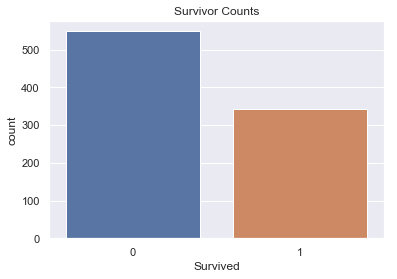

In [115]:
ax=plt.axes()
sns.countplot(data=train, x='Survived', ax=ax)
ax.set_title('Survivor Counts')

Text(0.5,1,'Suvivor Counts by Sex')

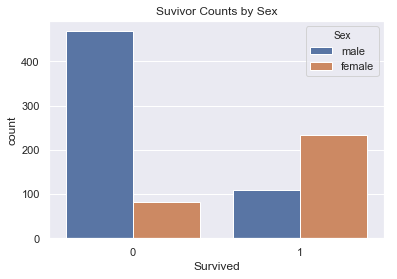

In [116]:
ax=plt.axes()
sns.countplot(data=train, x='Survived', hue= 'Sex', ax=ax)
ax.set_title('Suvivor Counts by Sex')

Text(0.5,1,'Survivor Counts by Class')

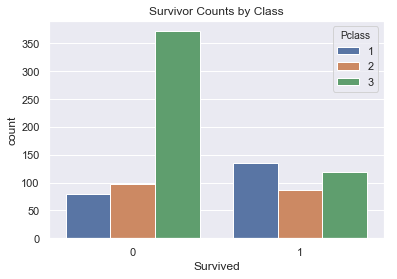

In [117]:
ax=plt.axes()
sns.countplot(data=train, x='Survived', hue= 'Pclass', ax=ax)
ax.set_title('Survivor Counts by Class')

Based off the graphs above, the best chance for survival was to be female and from the upper or middle class.

Let's look into other statistics for those aboard the titanic.

Text(0.5,1,'Age Distribution Aboard Titanic')

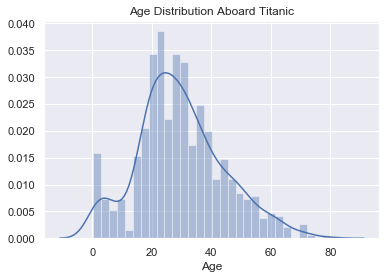

In [118]:
ax=plt.axes()
sns.distplot(train['Age'].dropna(), bins=30, ax=ax)
ax.set_title('Age Distribution Aboard Titanic')

Text(0.5,1,'Siblings / Spouses Aboard Titanic')

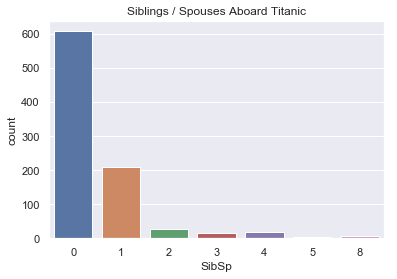

In [119]:
ax=plt.axes()
sns.countplot(data=train, x='SibSp', ax=ax)
ax.set_title('Siblings / Spouses Aboard Titanic')

Text(0.5,1,'Fares to Board Titanic')

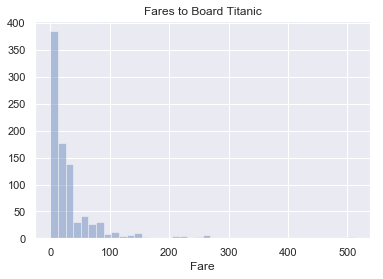

In [120]:
ax=plt.axes()
sns.distplot(train['Fare'], kde=False, bins=40, ax=ax)
ax.set_title('Fares to Board Titanic')

### Cleaning Train Data

Created a heatmap below to determine location of errors. It looks like some data is missing from age and alot of data is missing from Cabin. I can back fill the missing data from age.I think I will drop the cabin data.

Text(0.5,1,'Error Heatmap')

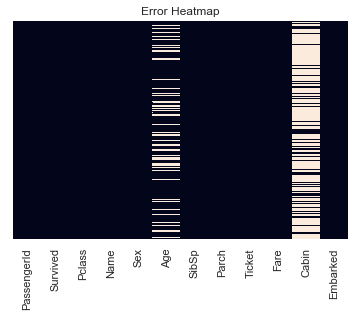

In [113]:
ax=plt.axes()
sns.heatmap(train.isnull(), yticklabels= False, cbar=False, ax=ax)
ax.set_title('Error Heatmap')

I can impute the age data based off the average class of the passenger.

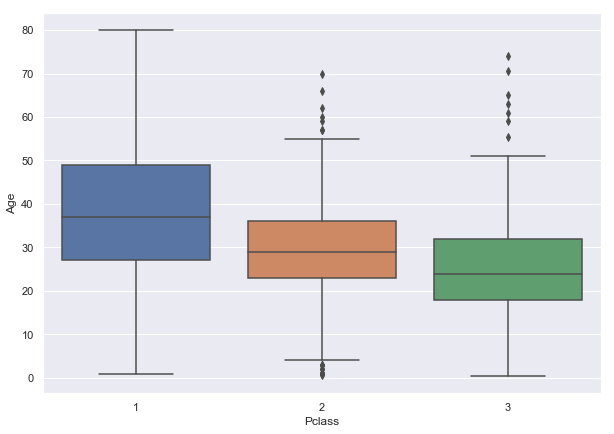

In [121]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train, x='Pclass', y='Age')

Created a function to replace missing ages with averages that are dependant on the class of the passenger.

In [122]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [123]:
train['Age']=train[['Age','Pclass']].apply(impute_age, axis=1)

Checking the errors were removed.

Text(0.5,1,'Error Heatmap w/ Imputed Ages')

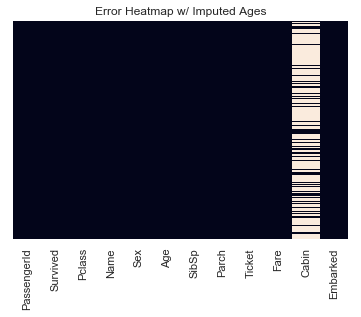

In [124]:
ax=plt.axes()
sns.heatmap(train.isnull(), yticklabels= False, cbar=False, ax=ax)
ax.set_title('Error Heatmap w/ Imputed Ages')

Dropping the Cabind Data column and checking via heatmap.

In [125]:
train.drop('Cabin', axis=1, inplace=True)

In [126]:
train.dropna(inplace=True)

Text(0.5,1,'Error Heatmap w/ Imputed Ages & Dropped Cabin Data')

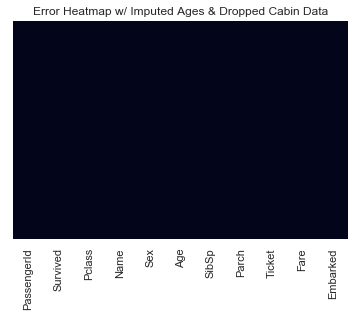

In [127]:
ax=plt.axes()
sns.heatmap(train.isnull(), yticklabels= False, cbar=False, ax=ax)
ax.set_title('Error Heatmap w/ Imputed Ages & Dropped Cabin Data')

#### Preparing Data for Machine Learning

Logistic regression does not handle non numeric variables, so I will convert those columns, such as sex and embark location to dummies. 

In [128]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [129]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [130]:
passclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [131]:
train=pd.concat([train,sex,embark,passclass], axis=1)

In [132]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0


In [133]:
train.drop(['Sex','Embarked', 'Name', 'Ticket','Pclass'], axis=1, inplace=True)

In [134]:
train.drop('PassengerId', axis=1, inplace=True)

In [135]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### Load & Clean Test Data

In [136]:
test=pd.read_csv('titanic_test.csv')

In [137]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Text(0.5,1,'Error Heatmap')

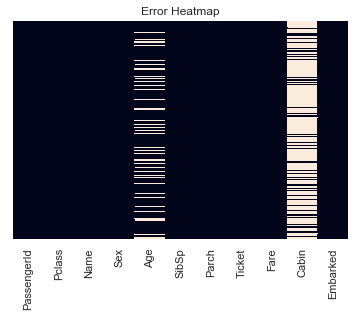

In [138]:
ax=plt.axes()
sns.heatmap(test.isnull(), yticklabels= False, cbar=False, ax=ax)
ax.set_title('Error Heatmap')

In [139]:
test['Age']=test[['Age','Pclass']].apply(impute_age, axis=1)

Text(0.5,1,'Error Heatmap w/ Imputed Ages')

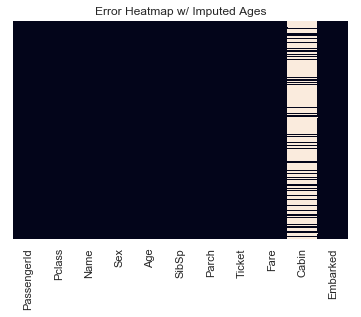

In [140]:
ax=plt.axes()
sns.heatmap(test.isnull(), yticklabels= False, cbar=False, ax=ax)
ax.set_title('Error Heatmap w/ Imputed Ages')

In [141]:
test.drop('Cabin', axis=1, inplace=True)

Text(0.5,1,'Error Heatmap w/ Imputed Ages')

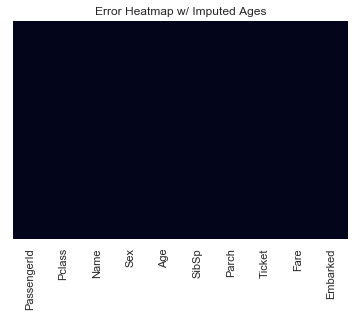

In [142]:
ax=plt.axes()
sns.heatmap(test.isnull(), yticklabels= False, cbar=False, ax=ax)
ax.set_title('Error Heatmap w/ Imputed Ages')

#### Preparing Data for Machine Learning

In [143]:
sex = pd.get_dummies(test['Sex'], drop_first=True)

In [144]:
embark = pd.get_dummies(test['Embarked'], drop_first=True)

In [145]:
passclass = pd.get_dummies(test['Pclass'], drop_first=True)

In [146]:
test=pd.concat([test,sex,embark,passclass], axis=1)

In [147]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [148]:
test.drop(['PassengerId', 'Sex','Embarked', 'Name', 'Ticket','Pclass'], axis=1, inplace=True)

In [149]:
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [150]:
print(test[test['Fare'].isnull()])

      Age  SibSp  Parch  Fare  male  Q  S  2  3
152  60.5      0      0   NaN     1  0  1  0  1


In [151]:
test['Fare'].fillna(10,inplace=True)

In [152]:
print(test[test['Fare'].isnull()])

Empty DataFrame
Columns: [Age, SibSp, Parch, Fare, male, Q, S, 2, 3]
Index: []


In [153]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### Machine Learning

Since the predictions can only come out as dead or alive, I am going to use logistic regression. 1 will represent survival and 0 will represent death.

In [154]:
X_train=train.drop('Survived', axis=1)
y_train=train['Survived']

In [155]:
X_test=test

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
lm=LogisticRegression()

In [158]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [159]:
predictions = lm.predict(X_test)

In [160]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [161]:
test=pd.read_csv('titanic_test.csv')

In [162]:
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})
submission.to_csv("submission.csv", index=False)

In [165]:
lm.coef_

array([[-0.03113006, -0.29919534, -0.07849652,  0.0047312 , -2.47684081,
        -0.00427697, -0.30737947, -0.58983584, -1.75479824]])

 This model was 76.076% accurate.